In [1]:
import pandas as pd

C:\Users\sachi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sachi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sachi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6729 - accuracy: 0.4990 - val_loss: 0.6579 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.5000 - val_loss: 0.6494 - val_accuracy: 0.5342
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.5225 - val_loss: 0.6426 - val_accuracy: 0.5662
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.5939 - val_loss: 0.6361 - val_accuracy: 0.6849
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6761 - val_loss: 0.6295 - val_accuracy: 0.7717
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.7084 - val_loss: 0.6229 - val_accuracy: 0.8082
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7446 - val_loss: 0.6159 - val_accuracy: 0.8174
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8708 - val_loss: 0.2941 - val_accuracy: 0.9087
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.8679 - val_loss: 0.2912 - val_accuracy: 0.9132
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8679 - val_loss: 0.2917 - val_accuracy: 0.9087
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8708 - val_loss: 0.2890 - val_accuracy: 0.9087
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8699 - val_loss: 0.2860 - val_accuracy: 0.9087
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8708 - val_loss: 0.2844 - val_accuracy: 0.9087
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3119 - accuracy: 0.8787 - val_loss: 0.2836 - val_accuracy: 0.9041
Epoch 

In [19]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 997us/step - loss: 0.2607 - accuracy: 0.8950


0.8949771523475647

In [20]:
import matplotlib.pyplot as plt

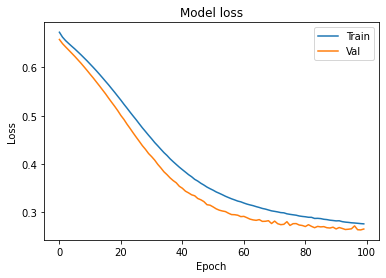

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

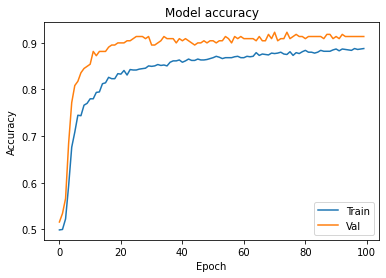

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [23]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4752 - accuracy: 0.7583 - val_loss: 0.3210 - val_accuracy: 0.8676
Epoch 2/100
32/32 [==============================] - 1s 27ms/step - loss: 0.3526 - accuracy: 0.8425 - val_loss: 0.3280 - val_accuracy: 0.8950
Epoch 3/100
32/32 [==============================] - 1s 27ms/step - loss: 0.3286 - accuracy: 0.8552 - val_loss: 0.2998 - val_accuracy: 0.9087
Epoch 4/100
32/32 [==============================] - 1s 27ms/step - loss: 0.2946 - accuracy: 0.8699 - val_loss: 0.2681 - val_accuracy: 0.9041
Epoch 5/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2648 - accuracy: 0.8806 - val_loss: 0.3007 - val_accuracy: 0.9041
Epoch 6/100
32/32 [==============================] - 1s 27ms/step - loss: 0.2734 - accuracy: 0.8826 - val_loss: 0.3727 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 1s 27ms/step - loss: 0.2594 - accuracy: 0.8914 - val_loss: 0.2615 - val_accuracy: 0.9178
Epoch 

32/32 [==============================] - 1s 27ms/step - loss: 0.1611 - accuracy: 0.9247 - val_loss: 0.4693 - val_accuracy: 0.9041
Epoch 59/100
32/32 [==============================] - 1s 26ms/step - loss: 0.1483 - accuracy: 0.9354 - val_loss: 0.4978 - val_accuracy: 0.9087
Epoch 60/100
32/32 [==============================] - 1s 28ms/step - loss: 0.1507 - accuracy: 0.9325 - val_loss: 0.4762 - val_accuracy: 0.9178
Epoch 61/100
32/32 [==============================] - 1s 27ms/step - loss: 0.1565 - accuracy: 0.9354 - val_loss: 0.4377 - val_accuracy: 0.9132
Epoch 62/100
32/32 [==============================] - 1s 33ms/step - loss: 0.1513 - accuracy: 0.9344 - val_loss: 0.5004 - val_accuracy: 0.9041
Epoch 63/100
32/32 [==============================] - 1s 41ms/step - loss: 0.1631 - accuracy: 0.9247 - val_loss: 0.4706 - val_accuracy: 0.9132
Epoch 64/100
32/32 [==============================] - 1s 32ms/step - loss: 0.1554 - accuracy: 0.9384 - val_loss: 0.5003 - val_accuracy: 0.9087
Epoch 65/100

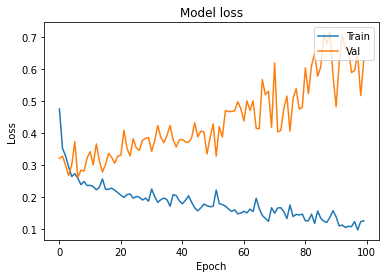

In [24]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

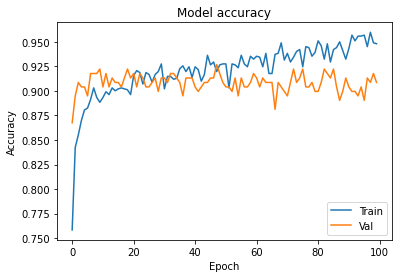

In [25]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [26]:
from keras.layers import Dropout
from keras import regularizers


In [27]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [28]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 55ms/step - loss: 14.2529 - accuracy: 0.6096 - val_loss: 3.8941 - val_accuracy: 0.8630
Epoch 2/100
32/32 [==============================] - 2s 48ms/step - loss: 1.6910 - accuracy: 0.8131 - val_loss: 0.6063 - val_accuracy: 0.8995
Epoch 3/100
32/32 [==============================] - 2s 57ms/step - loss: 0.5643 - accuracy: 0.8679 - val_loss: 0.4721 - val_accuracy: 0.9178
Epoch 4/100
32/32 [==============================] - 1s 43ms/step - loss: 0.5112 - accuracy: 0.8679 - val_loss: 0.4559 - val_accuracy: 0.9224
Epoch 5/100
32/32 [==============================] - 2s 51ms/step - loss: 0.5101 - accuracy: 0.8620 - val_loss: 0.4399 - val_accuracy: 0.9087
Epoch 6/100
32/32 [==============================] - 2s 48ms/step - loss: 0.5271 - accuracy: 0.8474 - val_loss: 0.4335 - val_accuracy: 0.9132
Epoch 7/100
32/32 [==============================] - 1s 44ms/step - loss: 0.4838 - accuracy: 0.8718 - val_loss: 0.4242 - val_accuracy: 0.9178
Epoch

32/32 [==============================] - 1s 41ms/step - loss: 0.4360 - accuracy: 0.8777 - val_loss: 0.4228 - val_accuracy: 0.8995
Epoch 59/100
32/32 [==============================] - 1s 39ms/step - loss: 0.4563 - accuracy: 0.8630 - val_loss: 0.4105 - val_accuracy: 0.9087
Epoch 60/100
32/32 [==============================] - 1s 39ms/step - loss: 0.4599 - accuracy: 0.8757 - val_loss: 0.4058 - val_accuracy: 0.9224
Epoch 61/100
32/32 [==============================] - 1s 43ms/step - loss: 0.4433 - accuracy: 0.8757 - val_loss: 0.4036 - val_accuracy: 0.9224
Epoch 62/100
32/32 [==============================] - 1s 43ms/step - loss: 0.4532 - accuracy: 0.8718 - val_loss: 0.3972 - val_accuracy: 0.9178
Epoch 63/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4555 - accuracy: 0.8738 - val_loss: 0.4036 - val_accuracy: 0.9224
Epoch 64/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4578 - accuracy: 0.8679 - val_loss: 0.4154 - val_accuracy: 0.9178
Epoch 65/100

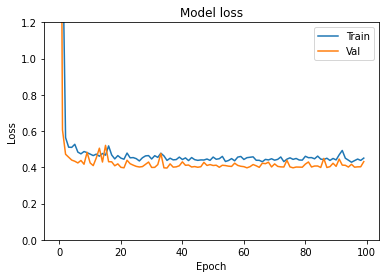

In [29]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

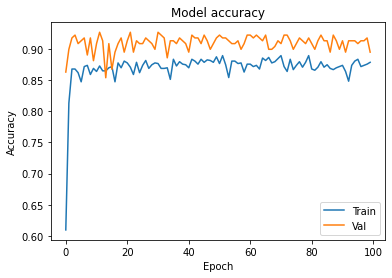

In [30]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()